### Import Library


In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


### Load Dataset

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


### Visualisasi Dataset

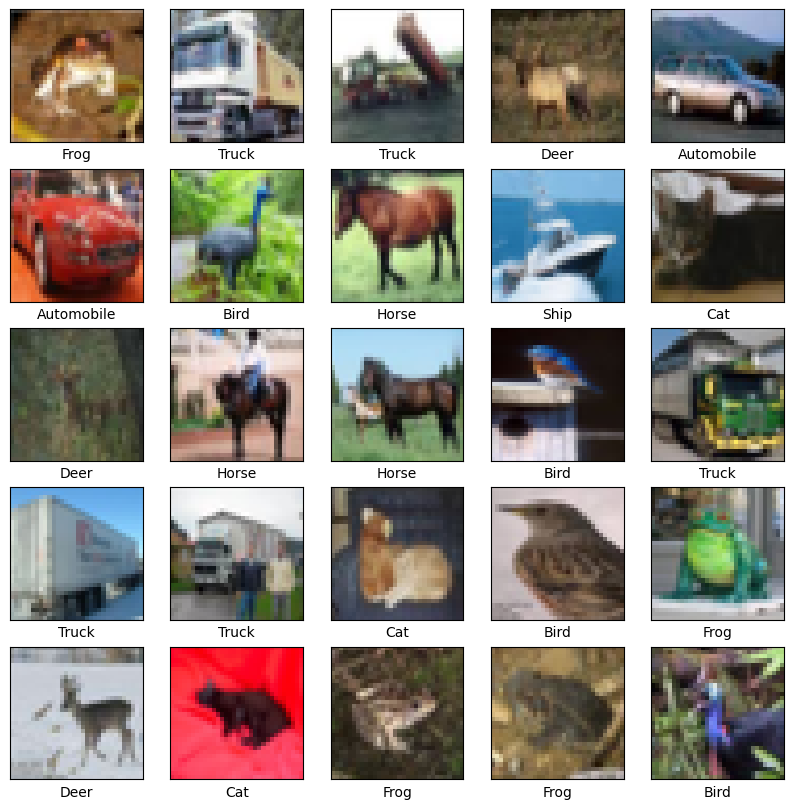

In [3]:
# Display a few examples from the dataset
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


### Bangun Model CNN

In [4]:
# Building the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flattening and dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Kompilasi Model

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Latih Model

In [6]:
# Training the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3271 - loss: 1.8113 - val_accuracy: 0.5207 - val_loss: 1.3233
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5471 - loss: 1.2618 - val_accuracy: 0.5934 - val_loss: 1.1464
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6073 - loss: 1.1057 - val_accuracy: 0.6395 - val_loss: 1.0238
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.6572 - loss: 0.9831 - val_accuracy: 0.6381 - val_loss: 1.0482
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6832 - loss: 0.9142 - val_accuracy: 0.6811 - val_loss: 0.9248
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7094 - loss: 0.8323 - val_accuracy: 0.6804 - val_loss: 0.9207
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7300 - loss: 0.7786 - val_accuracy: 0.6940 - val_loss: 0.8823
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7418 - loss: 0.7415 - 

### Plot Akurasi dan Loss

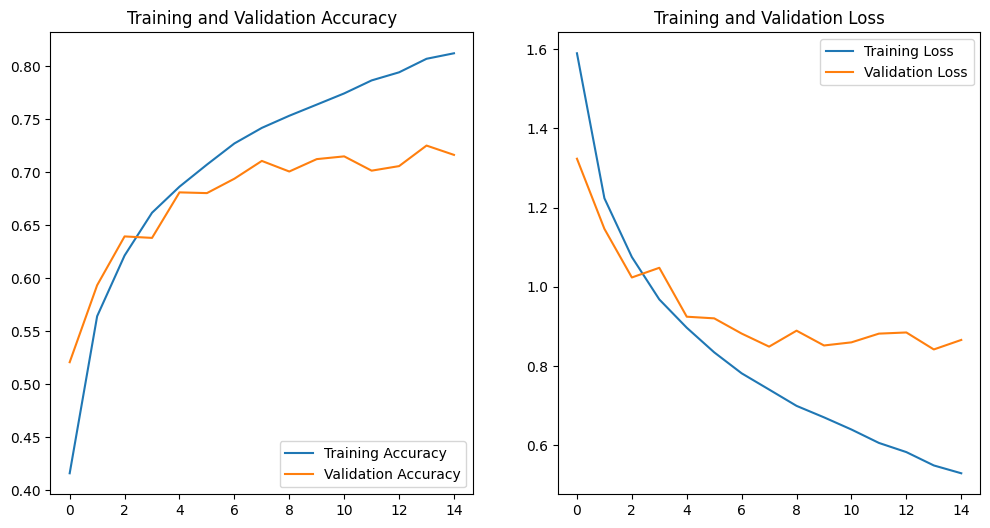

In [7]:
# Plotting training and validation accuracy/loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)


### Evaluasi Model

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Count the number of hidden layers
num_hidden_layers = len([layer for layer in model.layers if 'dense' in layer.name or 'conv2d' in layer.name or 'lstm' in layer.name])
print(f"Jumlah Hidden Layer: {num_hidden_layers}")

# Print the number of nodes per hidden layer
for i, layer in enumerate(model.layers):
    if 'dense' in layer.name or 'conv2d' in layer.name:
        output_shape = layer.output.shape  # Gunakan layer.output untuk mendapatkan output shape
        print(f"Layer {i} ({layer.name}): Jumlah Node = {output_shape[-1]}")

# Calculate the total weights
total_weights = sum([layer.count_params() for layer in model.layers])
print(f"Jumlah Total Bobot (Weight): {total_weights}")

# Show weights for each layer
for i, layer in enumerate(model.layers):
    print(f"Layer {i} ({layer.name}): Bobot = {layer.count_params()}")


313/313 - 2s - 5ms/step - accuracy: 0.7165 - loss: 0.8662
Test Accuracy: 0.72
Jumlah Hidden Layer: 5
Layer 0 (conv2d): Jumlah Node = 32
Layer 2 (conv2d_1): Jumlah Node = 64
Layer 4 (conv2d_2): Jumlah Node = 64
Layer 6 (dense): Jumlah Node = 64
Layer 7 (dense_1): Jumlah Node = 10
Jumlah Total Bobot (Weight): 122570
Layer 0 (conv2d): Bobot = 896
Layer 1 (max_pooling2d): Bobot = 0
Layer 2 (conv2d_1): Bobot = 18496
Layer 3 (max_pooling2d_1): Bobot = 0
Layer 4 (conv2d_2): Bobot = 36928
Layer 5 (flatten): Bobot = 0
Layer 6 (dense): Bobot = 65600
Layer 7 (dense_1): Bobot = 650


### Simpan Model

In [10]:
# Save the model
model.save("cifar10_cnn_model.h5")
print("Model saved as cifar10_cnn_model.h5")


Model saved as cifar10_cnn_model.h5
